<a href="https://colab.research.google.com/github/Benaziir/Practica5/blob/main/2_Filtrado_de_DataFrames_y_Series_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio - Busqueda de Alojamiento en Airbnb.

Supongamos que somos un agente de [Airbnb](http://www.airbnb.com) localizado en Lisboa, y tenemos que atender peticiones de varios clientes. Tenemos un archivo llamado `airbnb.csv` (en la carpeta data) donde tenemos información de todos los alojamientos de Airbnb en Lisboa.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df_airbnb = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EvaluacionPC5/src/airbnb.csv")

In [ ]:
df_airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


In [ ]:
df_airbnb.dtypes

room_id                   int64
host_id                   int64
room_type                object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
dtype: object

En concreto el dataset tiene las siguientes variables:
- room_id: el identificador de la propiedad
- host_id: el identificador del dueño de la propiedad
- room_type: tipo de propiedad (vivienda completa/(habitacion para compartir/habitación privada)
- neighborhood: el barrio de Lisboa
- reviews: El numero de opiniones
- overall_satisfaction: Puntuacion media del apartamento
- accommodates: El numero de personas que se pueden alojar en la propiedad
- bedrooms: El número de habitaciones
- price: El precio (en euros) por noche

## Usando Pandas

### Caso 1.

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [ ]:
# Consejo: para mostrar 3 alternativas emplee head(3)

In [ ]:
df1 = df_airbnb[(df_airbnb['accommodates']==4)&(df_airbnb['room_type']=='Entire home/apt')&(df_airbnb['bedrooms']==2)&(df_airbnb['reviews']>10)&(df_airbnb['overall_satisfaction']>4)].sort_values(['overall_satisfaction','reviews'],ascending=[False,False])
df1=df1.drop(['neighborhood','price'],axis=1).head(3)
df1

,room_id,host_id,room_type,reviews,overall_satisfaction,accommodates,bedrooms
120,176153,842219,Entire home/apt,438,5.0,4,2.0
140,202150,989393,Entire home/apt,274,5.0,4,2.0
388,496195,647439,Entire home/apt,259,5.0,4,2.0


### Caso 2

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387  respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

In [ ]:
df2=df_airbnb[(df_airbnb['room_id']==97503)|(df_airbnb['room_id']==90387)]
df2.to_excel("roberto.xlsx", sheet_name='Reviews Roberto Clara')


### Caso 3

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas *(room_type == Shared room)*, y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

In [ ]:
df_airbnb['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [ ]:
df3=df_airbnb[df_airbnb['price']<=50].sort_values(['price','room_type','overall_satisfaction'],ascending=[True,False,False])
df3.head(10)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
1010,1179457,5799522,Shared room,Santo António,42,4.0,16,1.0,10.0
3562,5557699,28812904,Shared room,Santa Maria Maior,22,4.0,1,1.0,10.0
7584,13116032,72951043,Shared room,Arroios,1,0.0,8,1.0,10.0
13148,19314160,135270245,Shared room,Santa Clara,0,0.0,1,1.0,10.0
5279,8422256,29862851,Private room,Alvalade,0,0.0,1,1.0,10.0
12726,18969195,73546613,Private room,Areeiro,0,0.0,1,1.0,10.0
13133,19292095,36108575,Private room,Carnide,0,0.0,2,1.0,10.0
7763,13342103,3518523,Entire home/apt,Santa Maria Maior,52,4.5,4,1.0,10.0
9065,14933182,91501272,Shared room,Santo António,5,5.0,8,1.0,11.0
4353,6728244,28812904,Shared room,Santa Maria Maior,8,4.5,1,1.0,11.0


## Usando MatPlot

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

### Caso 1.

Realizar un gráfico circular, de la cantidad de tipo de habitaciones `room_type`  

<Axes: ylabel='room_type'>

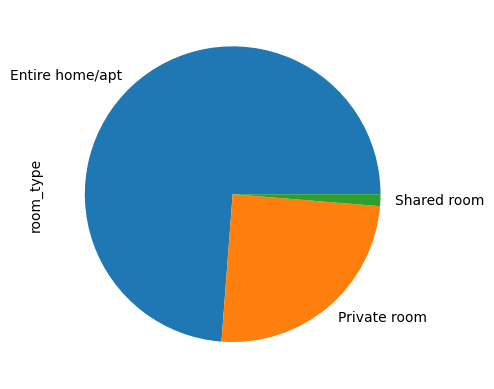

In [ ]:
df_airbnb.room_type.value_counts().plot.pie()